In [352]:
# from google.colab import drive
# drive.mount('/content/drive')

In [353]:
# ! pip install pgmpy

In [354]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [355]:
import pandas as pd
import numpy as np

import common

In [356]:
date_set_path = "../temp_sets_100/"

# callout

## Data Process

### Read samples

In [357]:
callout_df = common.read_csv_no_rowid(date_set_path+"callout.csv")

In [359]:
callout_df.head()

,subject_id,hadm_id,submit_wardid,submit_careunit,curr_wardid,curr_careunit,callout_wardid,callout_service,request_tele,request_resp,...,callout_status,callout_outcome,discharge_wardid,acknowledge_status,createtime,updatetime,acknowledgetime,outcometime,firstreservationtime,currentreservationtime
0,569,116412,7,CCU,7,CCU,2,CCU,1,0,...,Inactive,Cancelled,NaN,Unacknowledged,2105-02-22 11:06:03,2105-02-22 11:25:39,NaN,2105-02-22 11:25:39,NaN,NaN
1,569,116412,7,NaN,2,CCU,2,CCU,1,0,...,Inactive,Discharged,2.0,Acknowledged,2105-02-23 09:55:50,2105-02-23 09:55:50,2105-02-23 10:00:30,2105-02-23 18:10:02,NaN,NaN
2,26282,123094,57,NaN,40,SICU,1,SURG,0,0,...,Inactive,Discharged,40.0,Acknowledged,2152-04-01 14:11:33,2152-04-01 14:11:33,2152-04-01 15:17:43,2152-04-01 21:25:02,NaN,NaN
3,17024,164366,52,NaN,18,MICU,1,OMED,0,0,...,Inactive,Discharged,18.0,Revised,2104-10-19 11:05:20,2104-10-19 11:07:40,NaN,2104-10-19 16:40:05,NaN,NaN
4,17024,170848,12,NaN,55,CSRU,55,CSURG,1,0,...,Inactive,Discharged,55.0,Revised,2106-08-14 08:30:35,2106-08-14 16:36:33,NaN,2106-08-14 18:10:03,NaN,NaN


### Data preproces

In [360]:
# Drop useless colums
callout_df.drop(['submit_careunit', 'firstreservationtime', 'currentreservationtime'], axis=1, inplace=True)

#### Deal with null values

In [361]:
# Check null value in table
common.nan_count(callout_df)

Total columns: 20
Total rows: 73
--------------
subject_id            0
hadm_id               0
submit_wardid         0
curr_wardid           0
curr_careunit         0
callout_wardid        0
callout_service       0
request_tele          0
request_resp          0
request_cdiff         0
request_mrsa          0
request_vre           0
callout_status        0
callout_outcome       0
discharge_wardid      6
acknowledge_status    0
createtime            0
updatetime            0
acknowledgetime       5
outcometime           0
dtype: int64


#### Set the column types

In [362]:
callout_df.dtypes

subject_id              int64
hadm_id                 int64
submit_wardid           int64
curr_wardid             int64
curr_careunit          object
callout_wardid          int64
callout_service        object
request_tele            int64
request_resp            int64
request_cdiff           int64
request_mrsa            int64
request_vre             int64
callout_status         object
callout_outcome        object
discharge_wardid      float64
acknowledge_status     object
createtime             object
updatetime             object
acknowledgetime        object
outcometime            object
dtype: object

In [363]:
# Transfer some date type
callout_df['createtime'] = pd.to_datetime(callout_df['createtime'])
callout_df['updatetime'] = pd.to_datetime(callout_df['updatetime'])
callout_df['acknowledgetime'] = pd.to_datetime(callout_df['acknowledgetime'])
callout_df['outcometime'] = pd.to_datetime(callout_df['outcometime'])

In [364]:
callout_df.dtypes

subject_id                     int64
hadm_id                        int64
submit_wardid                  int64
curr_wardid                    int64
curr_careunit                 object
callout_wardid                 int64
callout_service               object
request_tele                   int64
request_resp                   int64
request_cdiff                  int64
request_mrsa                   int64
request_vre                    int64
callout_status                object
callout_outcome               object
discharge_wardid             float64
acknowledge_status            object
createtime            datetime64[ns]
updatetime            datetime64[ns]
acknowledgetime       datetime64[ns]
outcometime           datetime64[ns]
dtype: object

#### Process time data

In [ ]:
admissions_df = common.read_csv_no_rowid(date_set_path+"admissions.csv")

In [365]:
admittime_df = admissions_df.loc[:, ['hadm_id', 'admittime']]
admittime_df['admittime'] = pd.to_datetime(admittime_df['admittime'])

In [366]:
callout_mid_df = pd.merge(left=callout_df, right=admittime_df, how='left', on=['hadm_id'])

In [368]:
callout_mid_df['outcometime'] = callout_mid_df.apply(common.time_process, args=('acknowledgetime', 'outcometime', 'updatetime'), axis=1)
callout_mid_df['acknowledgetime'] = callout_mid_df.apply(common.time_process, args=('updatetime', 'acknowledgetime'), axis=1)
callout_mid_df['updatetime'] = callout_mid_df.apply(common.time_process, args=('createtime', 'updatetime'), axis=1)
callout_mid_df['createtime'] = callout_mid_df.apply(common.time_process, args=('admittime', 'createtime'), axis=1)

In [369]:
callout_df = callout_mid_df.drop(['hadm_id', 'admittime', 'subject_id'], axis=1)

In [370]:
callout_df.head(30)

,submit_wardid,curr_wardid,curr_careunit,callout_wardid,callout_service,request_tele,request_resp,request_cdiff,request_mrsa,request_vre,callout_status,callout_outcome,discharge_wardid,acknowledge_status,createtime,updatetime,acknowledgetime,outcometime
0,7,7,CCU,2,CCU,1,0,0,0,0,Inactive,Cancelled,NaN,Unacknowledged,83163.0,1176.0,NaN,0.0
1,7,2,CCU,2,CCU,1,0,0,0,0,Inactive,Discharged,2.0,Acknowledged,165350.0,0.0,280.0,29372.0
2,57,40,SICU,1,SURG,0,0,0,0,0,Inactive,Discharged,40.0,Acknowledged,139173.0,0.0,3970.0,22039.0
3,52,18,MICU,1,OMED,0,0,0,0,0,Inactive,Discharged,18.0,Revised,133820.0,140.0,NaN,19945.0
4,12,55,CSRU,55,CSURG,1,0,0,0,0,Inactive,Discharged,55.0,Revised,289655.0,29158.0,NaN,5610.0
5,52,18,MICU,1,MED,0,0,0,0,0,Inactive,Discharged,18.0,Acknowledged,591058.0,105.0,4131.0,28528.0
6,52,24,MICU,1,MED,0,0,0,0,0,Inactive,Discharged,24.0,Acknowledged,72119.0,0.0,76.0,35389.0
7,7,45,CCU,1,MED,0,0,0,0,1,Inactive,Discharged,45.0,Acknowledged,292443.0,0.0,6244.0,65276.0
8,14,31,TSICU,31,NSURG,1,0,0,1,0,Inactive,Discharged,31.0,Acknowledged,1432230.0,0.0,1302.0,47415.0
9,15,2,CSRU,2,CSURG,1,0,0,0,0,Inactive,Discharged,2.0,Acknowledged,48091.0,0.0,644.0,10694.0


---

##  Build Network

In [371]:
from sdv.tabular import CTGAN
from sdv.constraints import FixedCombinations
from sdv.constraints import create_custom_constraint

In [372]:
callout_df.columns

Index(['submit_wardid', 'curr_wardid', 'curr_careunit', 'callout_wardid',
       'callout_service', 'request_tele', 'request_resp', 'request_cdiff',
       'request_mrsa', 'request_vre', 'callout_status', 'callout_outcome',
       'discharge_wardid', 'acknowledge_status', 'createtime', 'updatetime',
       'acknowledgetime', 'outcometime'],
      dtype='object')

### Set constraint

In [373]:
def time_is_valid(column_names, data):
    update_create = ((data['updatetime'] - data['createtime']).apply(lambda x: 0 <= x.days  <= 2))

    # acknowledge_update = \
    #     (pd.isna(data['acknowledgetime'])) | \
    #     (((pd.isna(data['acknowledgetime']) == False) & ((data['acknowledgetime'] - data['updatetime']).apply(lambda x: -1 <= x.days  <= 1))))

    # outcome_create = \
    #     (pd.isna(data['acknowledgetime']) & (callout_df['outcometime'] - callout_df['createtime']).apply(lambda x: 0 <= x.days <= 2)) | \
    #     ( \
    #         (pd.isna(data['acknowledgetime']) == False) & ((data['outcometime'] - data['acknowledgetime']).apply(lambda x: 0 <= x.days  <= 2)) \
    #     )
        
    return update_create# & acknowledge_update & outcome_create

In [374]:
def time_trasform(column_names, data):
    data['outcometime'] = data['outcometime'].astype(int) - data['acknowledgetime'].astype(int)
    data['acknowledgetime'] = data['acknowledgetime'].astype(int) - data['updatetime'].astype(int)
    data['updatetime'] = data['updatetime'].astype(int) - data['createtime'].astype(int)

    return data

def time_reverse_transform(column_names, transformed_data):
    transformed_data['updatetime'] = transformed_data['updatetime'] + transformed_data['createtime']
    transformed_data['acknowledgetime'] = transformed_data['acknowledgetime'] + transformed_data['updatetime']
    transformed_data['outcometime'] = transformed_data['outcometime'] + transformed_data['acknowledgetime']

    # print(transformed_data.head())
    return transformed_data

In [375]:
TimeProcess = create_custom_constraint(
    is_valid_fn=time_is_valid,
    transform_fn=time_trasform,
    reverse_transform_fn=time_reverse_transform
)

time_constraint = TimeProcess(
    column_names=['createtime', 'updatetime','acknowledgetime', 'outcometime']
)

In [376]:
constrains = [time_constraint]

### Build and train model

In [377]:
model = CTGAN(
    # constraints=constrains, 
    # generator_lr=0.0005,
    batch_size=10000,
    cuda=True, 
    verbose=True, 
    epochs=60)

In [378]:
len(callout_df)

73

In [379]:
train_data = callout_df
model.fit(train_data)

Epoch 1, Loss G:  0.9391,Loss D:  0.0045
Epoch 2, Loss G:  0.9443,Loss D: -0.0491
Epoch 3, Loss G:  0.9241,Loss D: -0.0893
Epoch 4, Loss G:  0.9394,Loss D: -0.1419
Epoch 5, Loss G:  0.9055,Loss D: -0.1881
Epoch 6, Loss G:  0.8972,Loss D: -0.2496
Epoch 7, Loss G:  0.8890,Loss D: -0.2903
Epoch 8, Loss G:  0.8791,Loss D: -0.3577
Epoch 9, Loss G:  0.8585,Loss D: -0.4113
Epoch 10, Loss G:  0.8337,Loss D: -0.4732
Epoch 11, Loss G:  0.7706,Loss D: -0.5258
Epoch 12, Loss G:  0.7367,Loss D: -0.5946
Epoch 13, Loss G:  0.6782,Loss D: -0.6241
Epoch 14, Loss G:  0.6167,Loss D: -0.6555
Epoch 15, Loss G:  0.5405,Loss D: -0.7079
Epoch 16, Loss G:  0.4874,Loss D: -0.7183
Epoch 17, Loss G:  0.4243,Loss D: -0.7100
Epoch 18, Loss G:  0.3387,Loss D: -0.6966
Epoch 19, Loss G:  0.3118,Loss D: -0.6875
Epoch 20, Loss G:  0.3046,Loss D: -0.6524
Epoch 21, Loss G:  0.2975,Loss D: -0.6405
Epoch 22, Loss G:  0.2872,Loss D: -0.6125
Epoch 23, Loss G:  0.3600,Loss D: -0.5772
Epoch 24, Loss G:  0.3527,Loss D: -0.5445
E

In [380]:
import cloudpickle

with open(date_set_path + "100_models/" + "callout_model.pkl", 'wb') as f:
    cloudpickle.dump(model, f)

In [381]:
# model.save(date_set_path + "100_models/" + "callout_model.pkl")

In [382]:
sample = model.sample(100)

In [391]:
sample.head(30)

,submit_wardid,curr_wardid,curr_careunit,callout_wardid,callout_service,request_tele,request_resp,request_cdiff,request_mrsa,request_vre,callout_status,callout_outcome,discharge_wardid,acknowledge_status,createtime,updatetime,acknowledgetime,outcometime
0,22,2,TSICU,12,CCU,0,0,0,0,0,Inactive,Discharged,20.0,Acknowledged,1374214.0,13205.0,7192.0,37628.0
1,10,44,CSRU,52,TRAUM,0,0,0,0,0,Inactive,Discharged,46.0,Acknowledged,1074151.0,4987.0,3140.0,25099.0
2,30,10,MICU,2,MED,0,0,0,0,0,Inactive,Discharged,37.0,Acknowledged,249570.0,17674.0,7835.0,47991.0
3,7,30,MICU,4,OMED,1,0,0,0,0,Inactive,Discharged,7.0,Acknowledged,160188.0,8571.0,2656.0,50287.0
4,32,25,CSRU,8,CSURG,0,0,0,0,0,Inactive,Discharged,35.0,Acknowledged,363879.0,15121.0,6019.0,33827.0
5,43,2,CCU,7,CSURG,0,0,0,0,0,Inactive,Discharged,39.0,Acknowledged,4647646.0,1562.0,2549.0,35012.0
6,7,2,MICU,17,MED,1,0,0,0,1,Inactive,Discharged,NaN,Acknowledged,441339.0,2016.0,3439.0,103450.0
7,7,2,MICU,50,TSURG,1,0,0,0,0,Inactive,Discharged,33.0,Acknowledged,403751.0,0.0,2.0,31317.0
8,10,31,SICU,5,MED,0,0,0,1,0,Inactive,Discharged,33.0,Acknowledged,280484.0,7796.0,3162.0,44955.0
9,7,24,MICU,4,CSURG,0,0,0,1,0,Inactive,Discharged,37.0,Acknowledged,887086.0,6553.0,7216.0,18174.0


---

## Evaluate data

In [384]:
from sdv.evaluation import evaluate

In [385]:
train_data.columns

Index(['submit_wardid', 'curr_wardid', 'curr_careunit', 'callout_wardid',
       'callout_service', 'request_tele', 'request_resp', 'request_cdiff',
       'request_mrsa', 'request_vre', 'callout_status', 'callout_outcome',
       'discharge_wardid', 'acknowledge_status', 'createtime', 'updatetime',
       'acknowledgetime', 'outcometime'],
      dtype='object')

In [386]:
evaluate(sample, train_data)

0.47895157665429317

In [387]:
sample['curr_careunit'].value_counts()

MICU     52
SICU     15
TSICU    12
CCU      11
CSRU     10
Name: curr_careunit, dtype: int64

<AxesSubplot:>

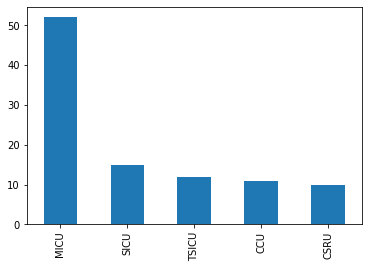

In [388]:
sample['curr_careunit'].value_counts().plot.bar()

In [389]:
train_data['curr_careunit'].value_counts()

MICU     32
TSICU    14
SICU     12
CSRU      9
CCU       6
Name: curr_careunit, dtype: int64

<AxesSubplot:>

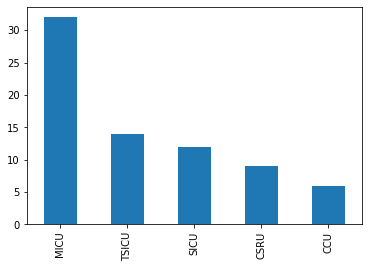

In [390]:
train_data['curr_careunit'].value_counts().plot.bar()